In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
metadata_dir = 'updated_metadata.csv'

annotations = pd.read_csv(metadata_dir)

# Distribución de los datos teniendo en cuenta el hallazgo

In [79]:
def zip_by_column(column: str) -> dict[str, dict]:
    split_distribution: dict[str, dict] = {}
    for column_values, split in zip(annotations[column], annotations['split']):
        split_distribution.setdefault(split, {})
        column_value = eval(column_values) if column == 'finding_categories' else [ column_values ]
        for category in column_value:
            category = str(category)
            split_distribution[split].setdefault(category, int(0))
            split_distribution[split][category] += 1
    return split_distribution

In [80]:
split_finding_distribution = zip_by_column('finding_categories')

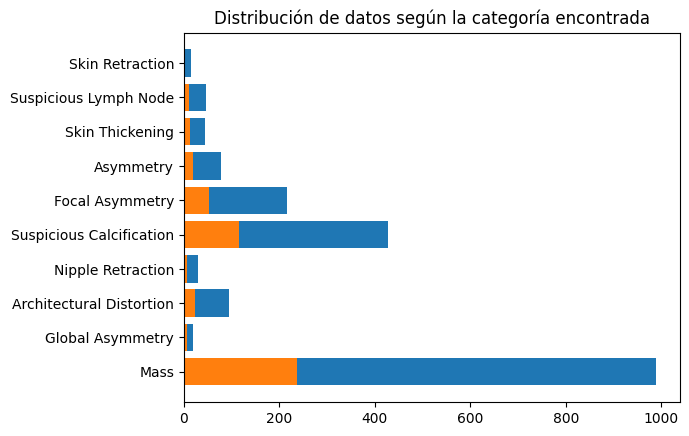

In [81]:
for split in split_finding_distribution:
    if 'No Finding' in split_finding_distribution[split]:
        del split_finding_distribution[split]['No Finding']

fig, ax = plt.subplots()
ax.set_title('Distribución de datos según la categoría encontrada')

height = 0.8
for boolean, weight_count in split_finding_distribution.items():
    ax.barh(weight_count.keys(), weight_count.values(), height, label=boolean)
plt.show()

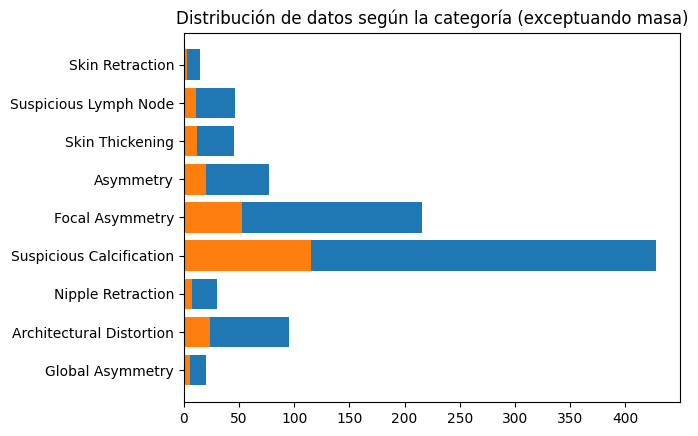

In [86]:
for split in split_finding_distribution:
    if 'Mass' in split_finding_distribution[split]:
        del split_finding_distribution[split]['Mass']

fig, ax = plt.subplots()
ax.set_title('Distribución de datos según la categoría (exceptuando masa)')

height = 0.8
for boolean, weight_count in split_finding_distribution.items():
    ax.barh(weight_count.keys(), weight_count.values(), height, label=boolean)
plt.show()

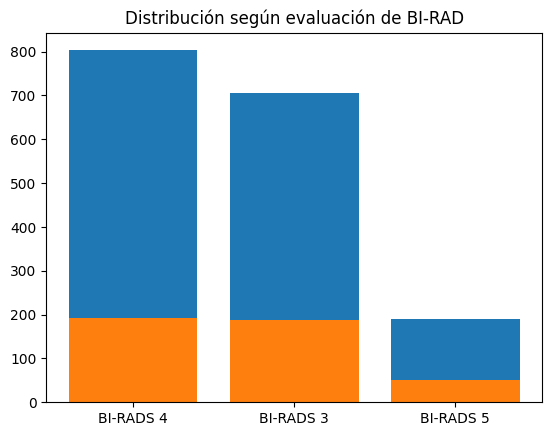

In [85]:
split_birads_distribution = zip_by_column('finding_birads')

for split in split_birads_distribution:
    if 'nan' in split_birads_distribution[split]:
        del split_birads_distribution[split]['nan']

fig, ax = plt.subplots()
ax.set_title('Distribución según evaluación de BI-RAD')

height = 0.8
for boolean, weight_count in split_birads_distribution.items():
    ax.bar(weight_count.keys(), weight_count.values(), height, label=boolean)
plt.show()

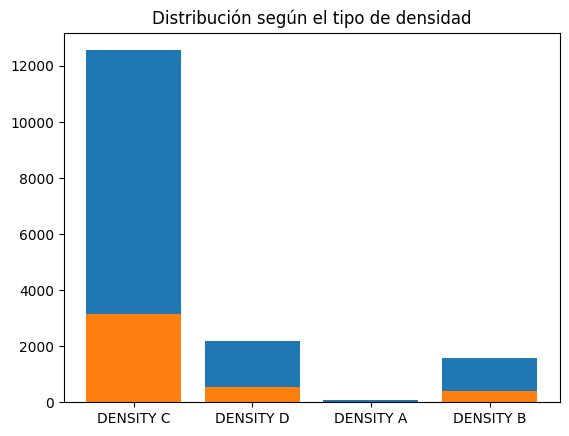

In [106]:
split_density_distribution = zip_by_column('breast_density')

# for split in split_density_distribution:
#     if 'nan' in split_density_distribution[split]:
#         del split_density_distribution[split]['nan']

fig, ax = plt.subplots()
ax.set_title('Distribución según el tipo de densidad')

height = 0.8
for boolean, weight_count in split_density_distribution.items():
    ax.bar(weight_count.keys(), weight_count.values(), height, label=boolean)
plt.show()

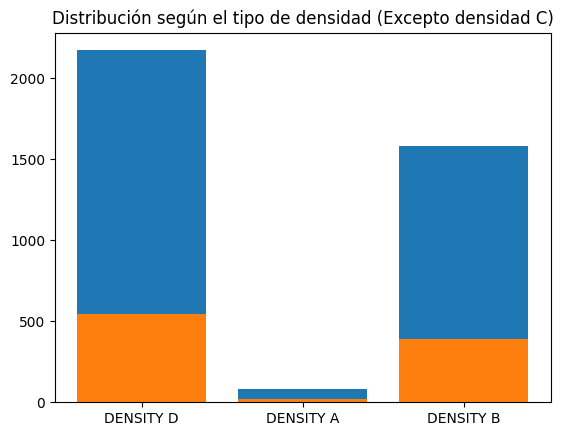

In [88]:
for split in split_density_distribution:
    if 'DENSITY C' in split_density_distribution[split]:
        del split_density_distribution[split]['DENSITY C']

fig, ax = plt.subplots()
ax.set_title('Distribución según el tipo de densidad (Excepto densidad C)')

height = 0.8
for boolean, weight_count in split_density_distribution.items():
    ax.bar(weight_count.keys(), weight_count.values(), height, label=boolean)
plt.show()

In [ ]:
%pip install pydicom
%pip install matplotlib
%pip install numpy
%pip install pandas

0.0 2143.0


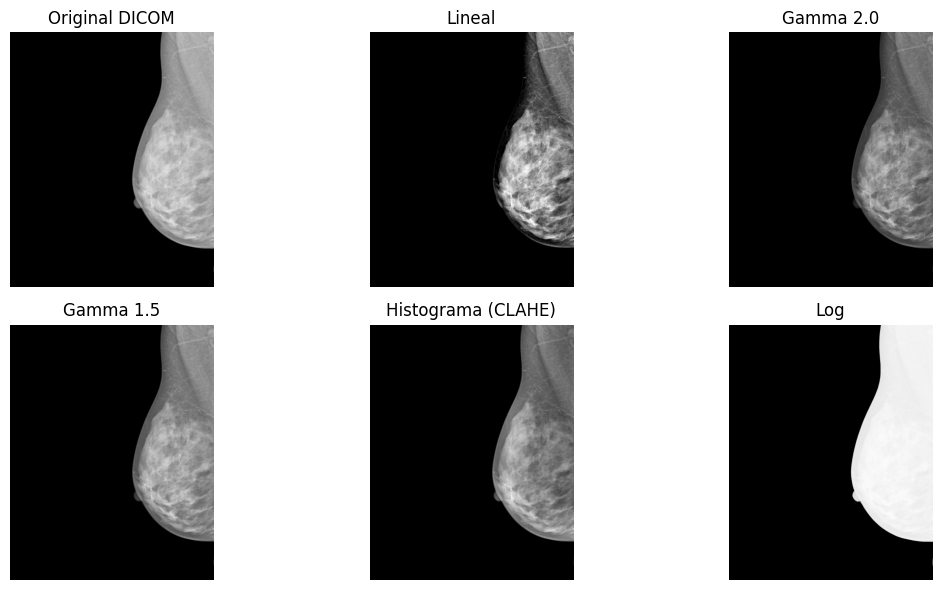

0.0 3479.0


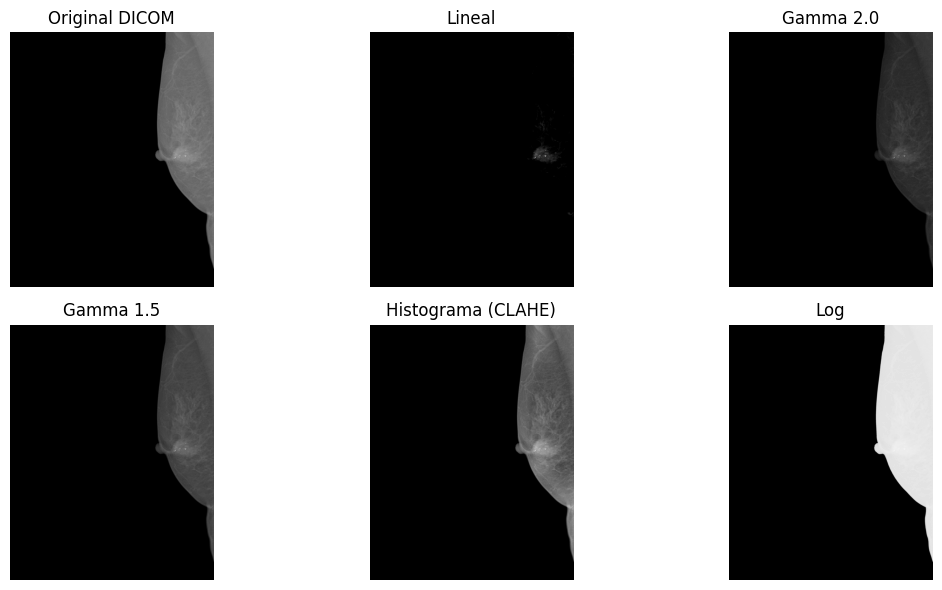

0.0 2112.0


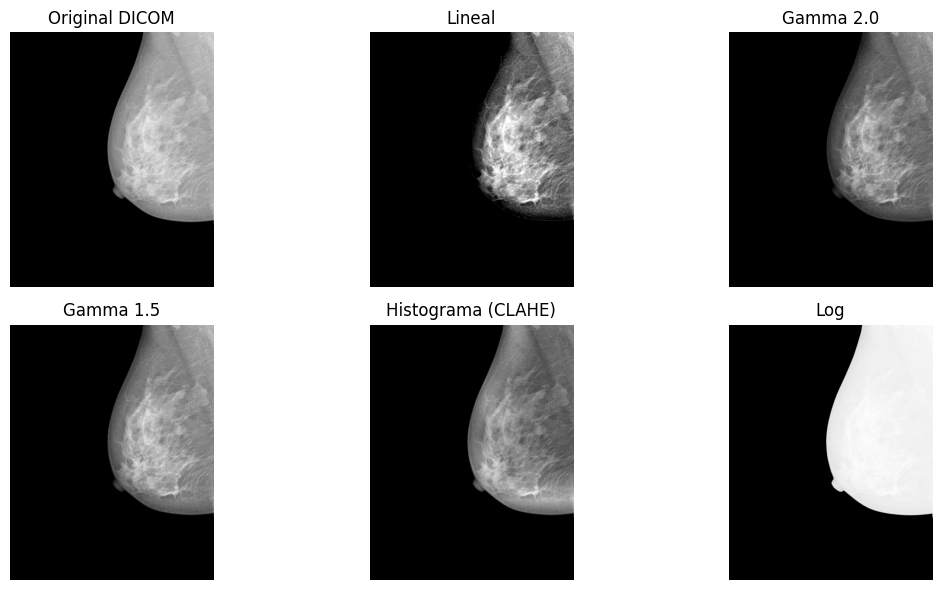

0.0 2000.0


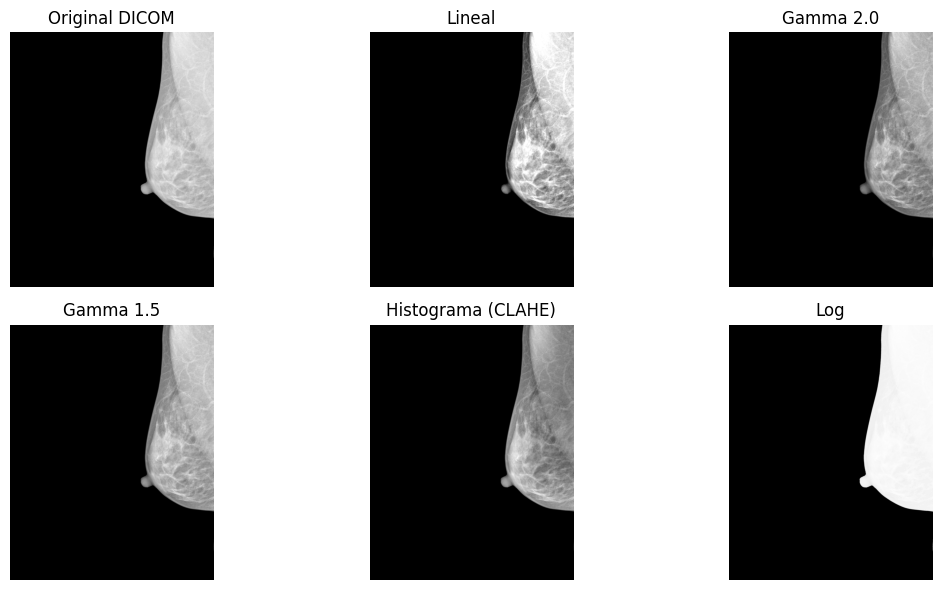

0.0 2168.0


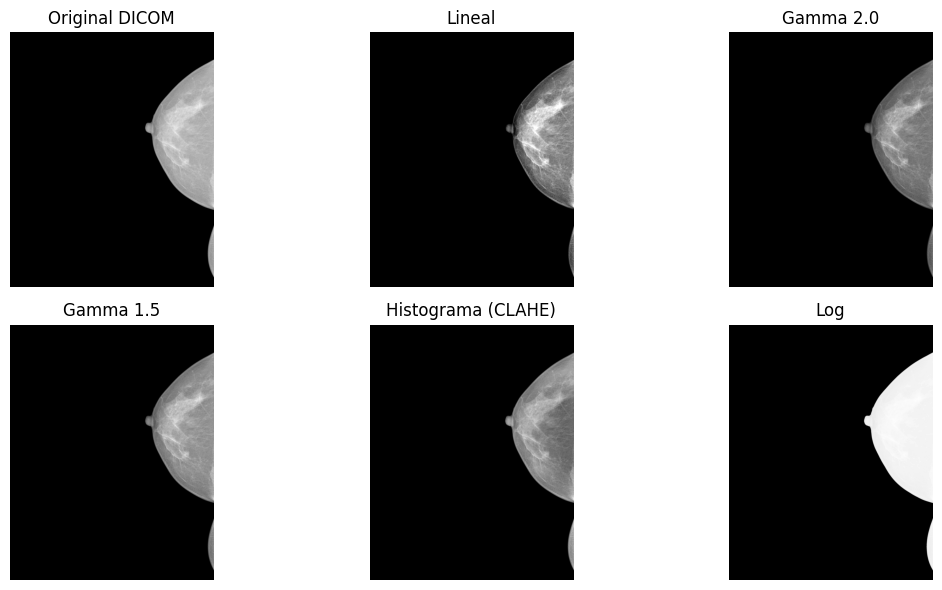

0.0 2624.0


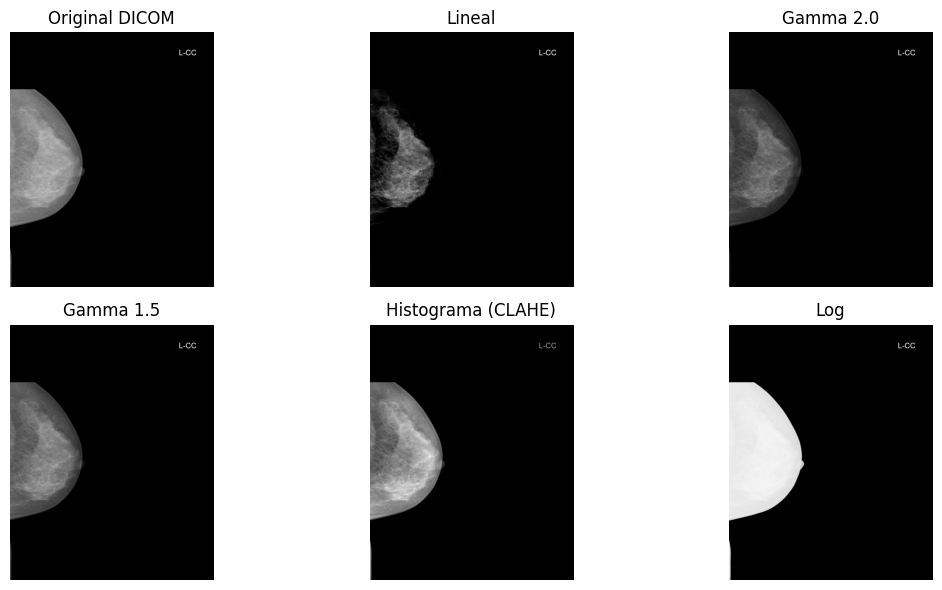

0.0 2791.0


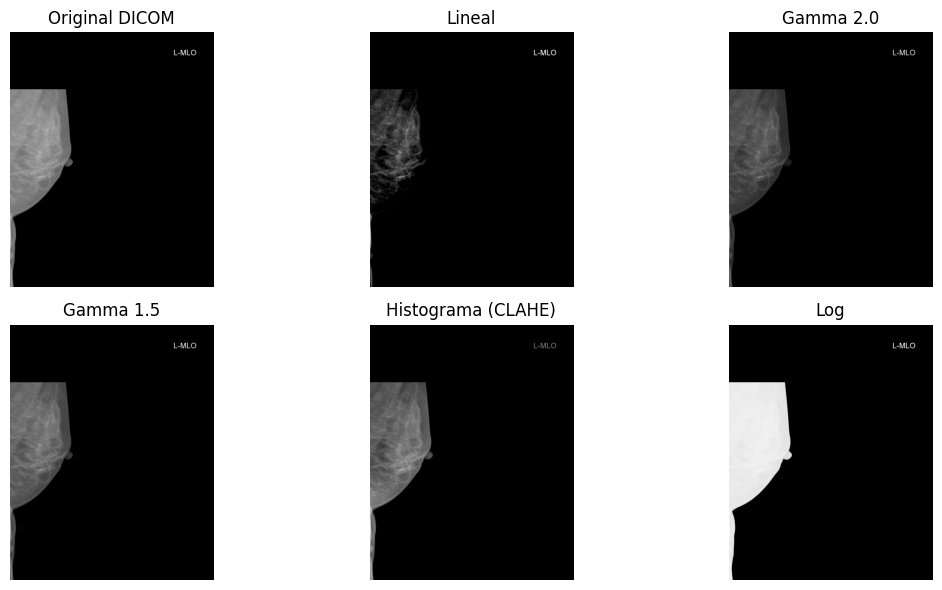

0.0 2624.0


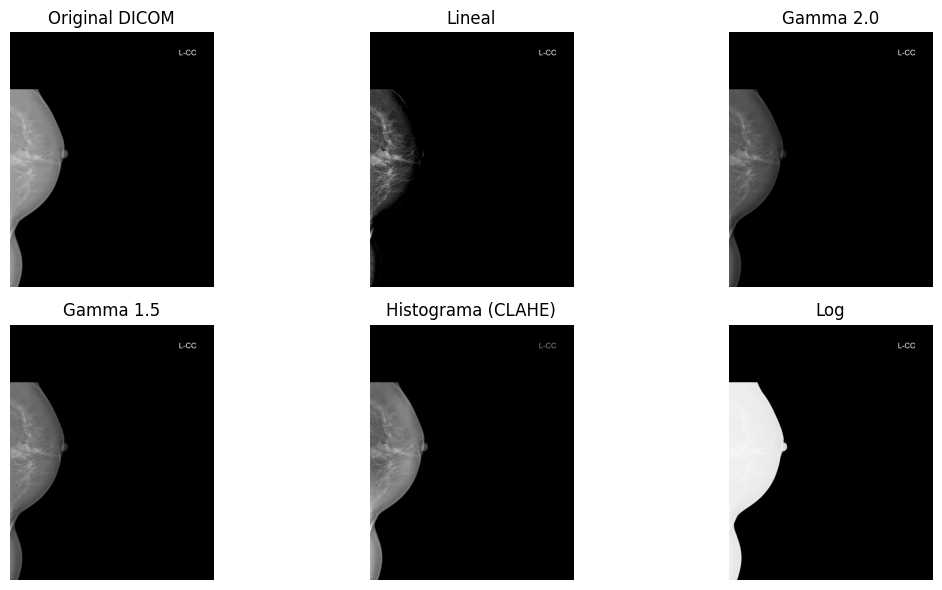

0.0 2374.0


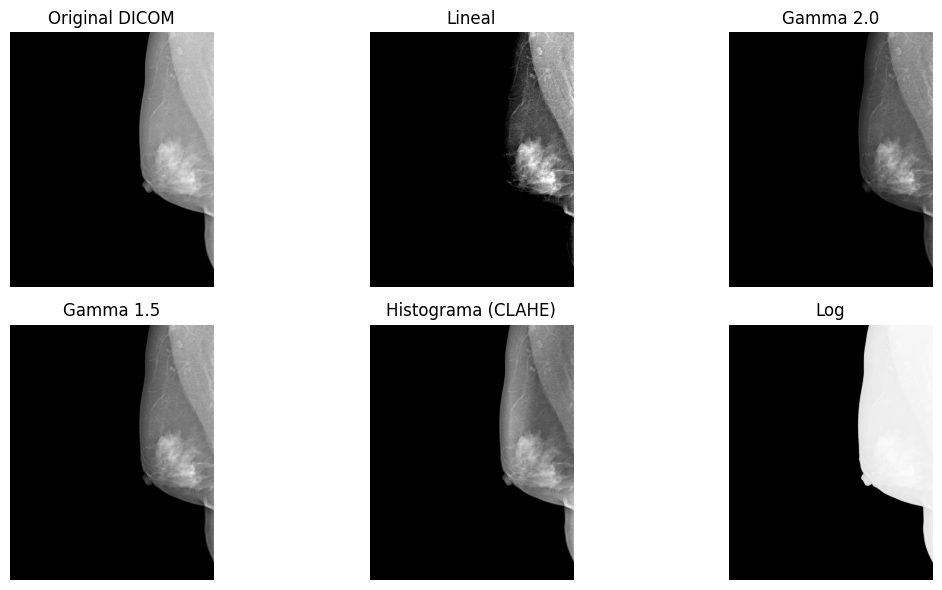

0.0 2624.0


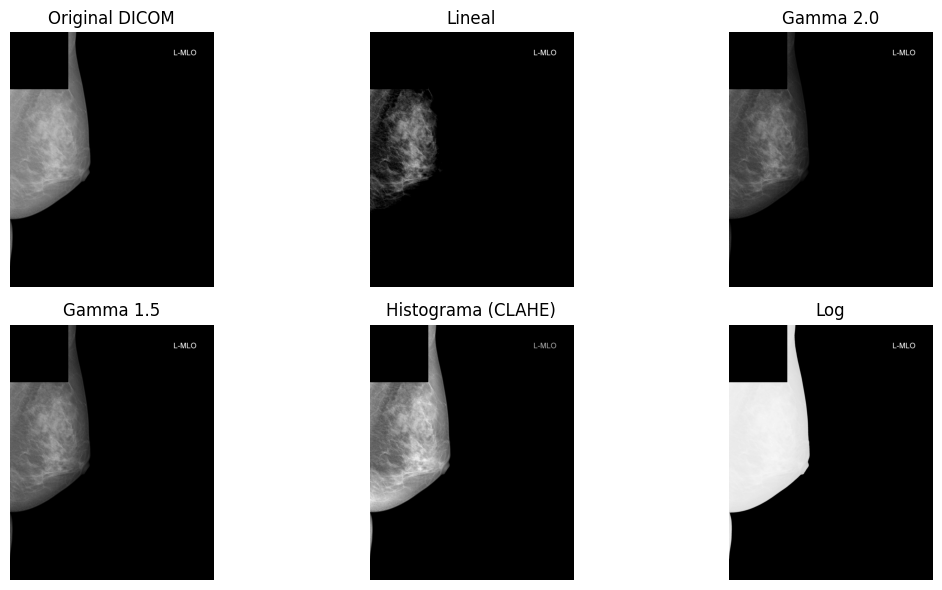

0.0 3042.0


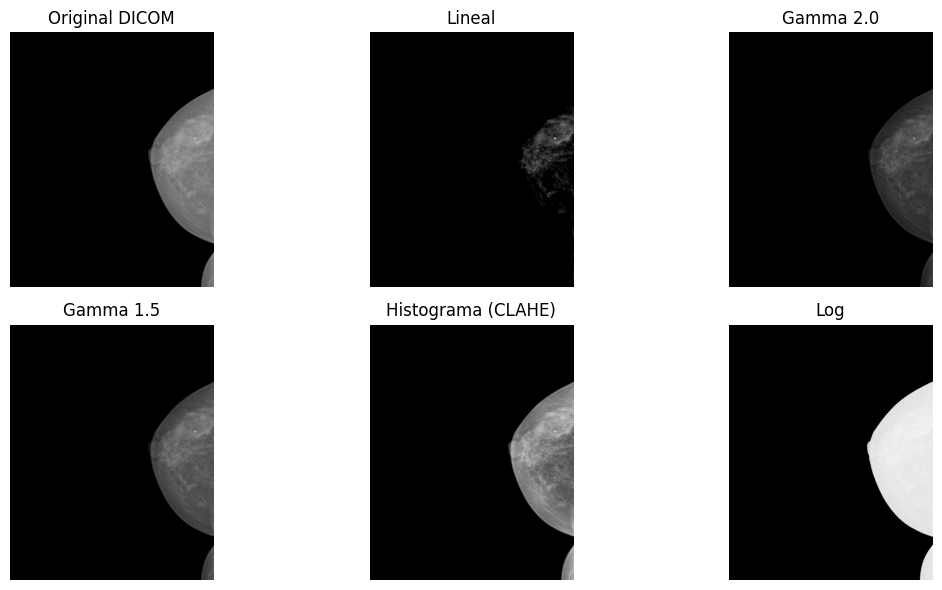

0.0 2101.0


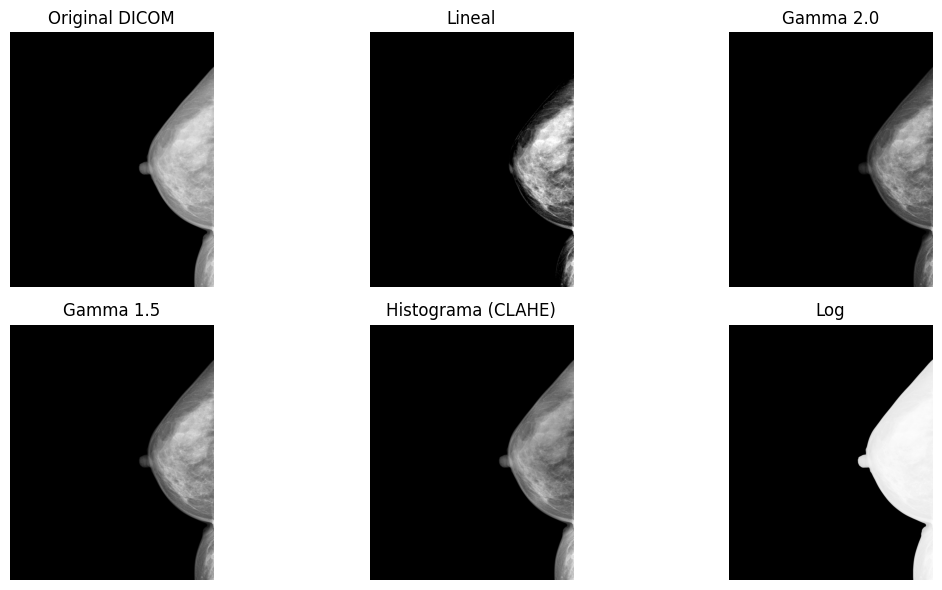

0.0 2624.0


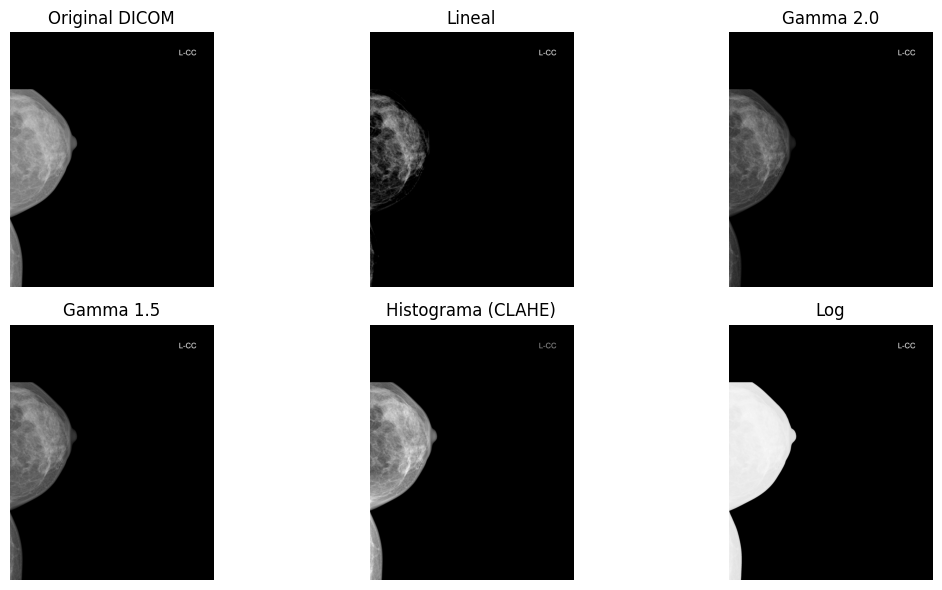

0.0 2695.0


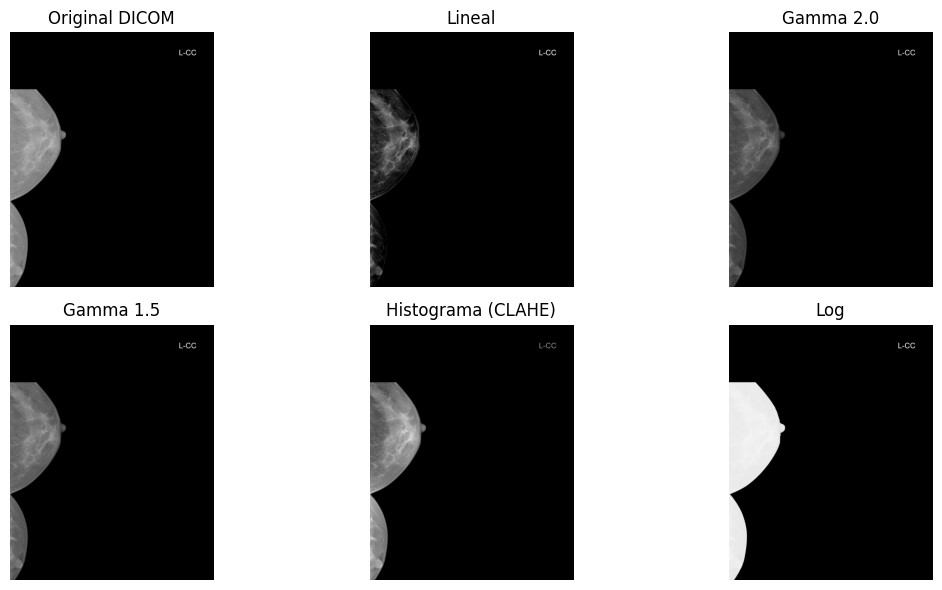

0.0 2624.0


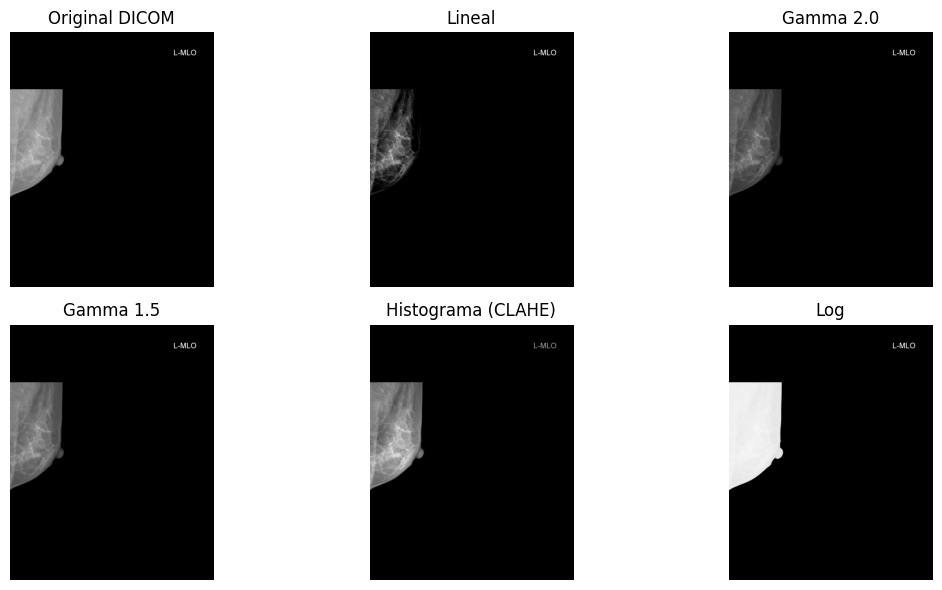

0.0 2624.0


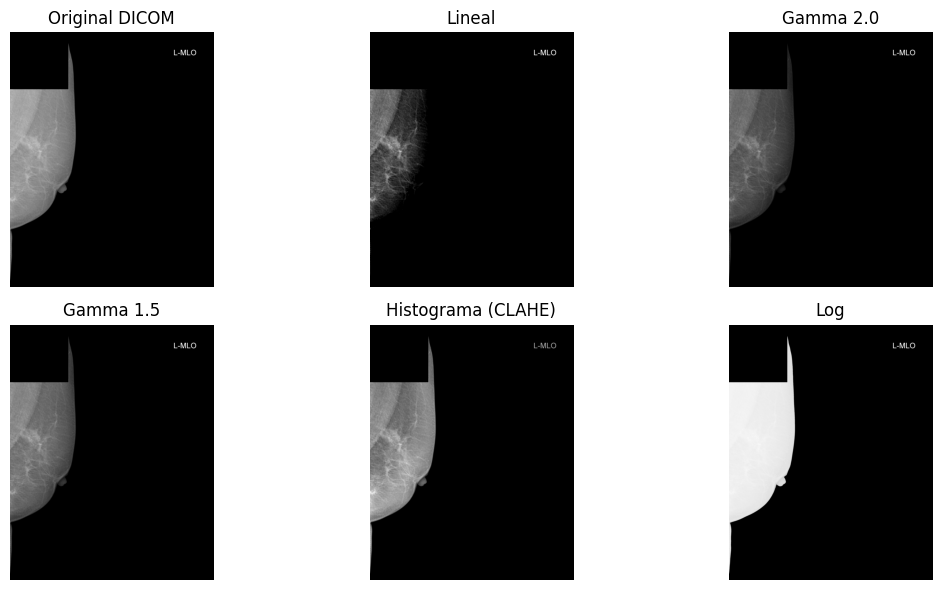

In [10]:
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

def listdir(path):
    return [os.path.join(path, file) for file in os.listdir(path)]

images = [dicom.dcmread(image_path) for image_path in listdir('images')]

for image_data in images:
    image = image_data.pixel_array.astype(np.float32)

    # Elimina el texto de la esquina superior izquierda
    image[0:800, 0:800] = 0

    min_val, max_val = image.min(), image.max()

    print(min_val, max_val)
    
    # 1. Tranformación lineal
    alpha = 2.5
    beta = -max_val * 1.2
    linear_transformed = np.clip(alpha * image + beta, min_val, max_val)


    # 2. Corrección Gamma (exponencial)
    gamma = 2.0
    gamma_corrected_2 = np.power(image / max_val, gamma) * max_val

    gamma = 1.5
    gamma_corrected_1_5 = np.power(image / max_val, gamma) * max_val

    # 3. Ecualización de Histograma (Usando CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hist_eq = clahe.apply(image.astype(np.uint16))


    # 4. Transformación logaritmica
    c = (max_val - min_val) / np.log(max_val - min_val)
    log_transformed = c * np.log(1 + image)



    # Presentación
    titles = ['Original DICOM', 'Lineal', 'Gamma 2.0', 'Gamma 1.5', 'Histograma (CLAHE)', 'Log']
    images = [image, linear_transformed, gamma_corrected_2, gamma_corrected_1_5, hist_eq, log_transformed]

    plt.figure(figsize=(12, 6))
    for i in range(len(titles)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
